# Car damage detection using FRCNN

In [1]:
import os
import glob
import pandas as pd
import argparse
import xml.etree.ElementTree as ET

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches

covert Xml file to csv file

In [17]:
# Function that will extract column data for our CSV file as pandas DataFrame
def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob('/home/unni/Car damage detection/blood/keras-frcnn/train_images/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            try:
                value = (root.find('filename').text,
                         int(root.find('size')[0].text),
                         int(root.find('size')[1].text),
                         member[0].text,
                         int(member[4][0].text),
                         int(member[4][1].text),
                         int(member[4][2].text),
                         int(member[4][3].text)
                         )
                xml_list.append(value)
            except:
                pass
    column_name = ['image_names', 'width', 'height', 'cell_type', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df
   
# apply the function to convert all XML files in images/ folder into labels.csv
train = xml_to_csv('/home/unni/Car damage detection/blood/keras-frcnn/')

save csv file in hardisk

In [18]:
train.to_csv(('/home/unni/Car damage detection/blood/keras-frcnn/train.csv'), index=None)


Display 1st five entries

In [19]:
train

,image_names,width,height,cell_type,xmin,ymin,xmax,ymax
0,BloodImage_00044.jpg,640,480,WBC,196,257,345,411
1,BloodImage_00044.jpg,640,480,WBC,1,40,121,154
2,BloodImage_00044.jpg,640,480,RBC,68,371,209,473
3,BloodImage_00044.jpg,640,480,RBC,69,288,154,383
4,BloodImage_00044.jpg,640,480,RBC,409,54,517,161
5,BloodImage_00044.jpg,640,480,RBC,49,142,157,249
6,BloodImage_00044.jpg,640,480,RBC,207,59,315,166
7,BloodImage_00044.jpg,640,480,RBC,170,145,278,252
8,BloodImage_00044.jpg,640,480,RBC,301,23,409,130
9,BloodImage_00044.jpg,640,480,RBC,503,168,611,275


Display a sample image

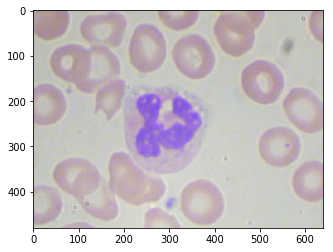

In [20]:
# reading single image using imread function of matplotlib
image = plt.imread('/home/unni/Car damage detection/blood/keras-frcnn/train_images/BloodImage_00174.jpg')
plt.imshow(image)

In [23]:
# Number of unique training images
train['image_names'].nunique()

364

In [24]:
# Number of classes
train['cell_type'].value_counts()

RBC          4155
WBC           372
Platelets     361
Name: cell_type, dtype: int64

Display the image with bounding box and the labelled classes

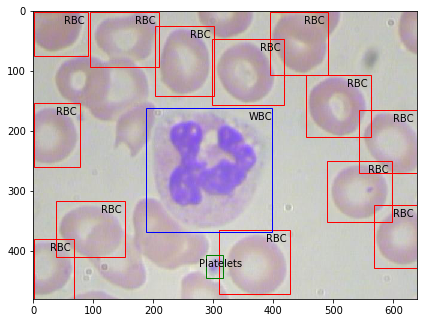

In [25]:
fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread('/home/unni/Car damage detection/blood/keras-frcnn/train_images/BloodImage_00174.jpg')
plt.imshow(image)

# iterating over the image for different objects
for _,row in train[train.image_names == "BloodImage_00174.jpg"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    # assign different color to different classes of objects
    if row.cell_type == 'RBC':
        edgecolor = 'r'
        ax.annotate('RBC', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'WBC':
        edgecolor = 'b'
        ax.annotate('WBC', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'Platelets':
        edgecolor = 'g'
        ax.annotate('Platelets', xy=(xmax-40,ymin+20))
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)

In [27]:
data = pd.DataFrame()
data['format'] = train['image_names']
#print(data['format'])
# as the images are in train_images folder, add train_images before the image name
for i in range(data.shape[0]):
    data['format'][i] = 'train_images/' + data['format'][i]
    #print(data['format'][i])
# add xmin, ymin, xmax, ymax and class as per the format required
for i in range(data.shape[0]):
    data['format'][i] = data['format'][i] + ',' + str(train['xmin'][i]) + ',' + str(train['ymin'][i]) + ',' + str(train['xmax'][i]) + ',' + str(train['ymax'][i]) + ',' + train['cell_type'][i]
    #print(data['format'][i])
data.to_csv('/home/unni/Car damage detection/blood/keras-frcnn/annotate.txt', header=None, index=None, sep=' ')

pip install tensorflow==1.13.1 

pip install keras==2.1.6

In [29]:
import h5py

f = h5py.File("/home/unni/my_project_work/car-damage-detection-using-CNN-master/car- damage data/car_damage_raw/keras-frcnn/model_frcnn.hdf5")

list(f)

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:3: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  This is separate from the ipykernel package so we can avoid doing imports until


['activation_1',
 'activation_10',
 'activation_11',
 'activation_12',
 'activation_13',
 'activation_14',
 'activation_15',
 'activation_16',
 'activation_17',
 'activation_18',
 'activation_19',
 'activation_2',
 'activation_20',
 'activation_21',
 'activation_22',
 'activation_23',
 'activation_24',
 'activation_25',
 'activation_26',
 'activation_27',
 'activation_28',
 'activation_29',
 'activation_3',
 'activation_30',
 'activation_31',
 'activation_32',
 'activation_33',
 'activation_34',
 'activation_35',
 'activation_36',
 'activation_37',
 'activation_38',
 'activation_39',
 'activation_4',
 'activation_40',
 'activation_41',
 'activation_42',
 'activation_43',
 'activation_44',
 'activation_45',
 'activation_46',
 'activation_47',
 'activation_48',
 'activation_49',
 'activation_5',
 'activation_6',
 'activation_7',
 'activation_8',
 'activation_9',
 'add_1',
 'add_10',
 'add_11',
 'add_12',
 'add_13',
 'add_14',
 'add_15',
 'add_16',
 'add_2',
 'add_3',
 'add_4',
 'add_5',


In [29]:
!python train_frcnn.py -o simple -p annotate.txt

Using TensorFlow backend.
Parsing annotation files
Training images per class:
{'Platelets': 361, 'RBC': 4155, 'WBC': 372, 'bg': 0}
Num classes (including bg) = 4
Config has been written to config.pickle, and can be loaded when testing to ensure correct results
Num train samples 314
Num val samples 50
Instructions for updating:
Colocations handled automatically by placer.
loading weights from ./resnet50_weights_tf_dim_ordering_tf_kernels.h5
2020-08-25 15:50:45.646329: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 1796035000 Hz
2020-08-25 15:50:45.647720: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x55f093416ed0 executing computations on platform Host. Devices:
2020-08-25 15:50:45.647847: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
Starting training
Epoch 1/1
Instructions for updating:
Use tf.cast instead.
1/1 [==============================] - 67s 67s/step - rpn_cls: 6.1381 - rpn_re

In [34]:
!python test_frcnn.py -p test_images

Using TensorFlow backend.
{0: 'WBC', 1: 'RBC', 2: 'Platelets', 3: 'bg'}
Instructions for updating:
Colocations handled automatically by placer.
Loading weights from ./model_frcnn.hdf5
2020-08-25 16:17:25.146215: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 1796035000 Hz
2020-08-25 16:17:25.146974: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x55995c33e8c0 executing computations on platform Host. Devices:
2020-08-25 16:17:25.147050: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
000000.jpg
Elapsed time = 17.37372660636902
[('WBC', 98.69557619094849), ('WBC', 98.15969467163086), ('WBC', 97.63259291648865), ('WBC', 95.0474202632904), ('WBC', 91.99845790863037), ('WBC', 90.99816679954529), ('WBC', 89.42068219184875), ('WBC', 88.26262354850769), ('WBC', 86.7743194103241), ('WBC', 85.57248115539551), ('WBC', 84.41358804702759), ('WBC', 83.76458883285522), ('RBC', 99.33132529258728)]
0001.jp